
# Project: Regional Growth with Gapminder World

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
**1.Which regions had higher rates of urban growth in 2017?**<br>
**2.Which indicator has a stronger relationship with the Urban Growth (UG) indicator? Is the relationship between urban growth and population growth stable?**<br>
**3.How have the indicators behaved in the last 10 years?**<br>  
<br>
**The main objectives are to find trends between the selected metrics and discover the regions that stood out in UG in 2017.<br>
Dataframes from Gapminder World, with updates from the source:**<br>
<br>
**Urban population growth (annual %)**<br>
Primer source: World Bank<br>
Category: Population<br>	
Subcategory: Urbanization<br>
<br>
**HDI (Human Development Index):**<br>
Primer source:	UNDP(United Nations Development Programme)+ Update(:2017)<br>
Category: Society<br>	 
HDI is an index used to rank countries by level of "human development".<br>
It contains three dimensions: health level, educational level and living standard.(http://wikiprogress.org/articles/initiatives/human-development-index/)<br>
<br>

**Inequality index (Gini)**<br>
Primer source: The World Bank<br>
Category: Economy<br>
Subcategory: Poverty & inequality<br>
"In economics, the Gini coefficient (/ˈdʒiːni/ JEE-nee), sometimes called Gini index, or Gini ratio, is a measure of statistical dispersion intended to represent the income or wealth distribution of a nation's residents, and is the most commonly used measurement of inequality." (https://en.wikipedia.org/wiki/Gini_coefficient_)
<br>
**Population growth (annual %)**<br>	
Primer source: The World Bank<br>
Category: Population<br>	
Subcategory: Population growth<br>
The population growth indicator is used to check its behavior along with its rates, in comparison with the Urban growth indicator.<br>



In [1039]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1040]:
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In this first section, I import the dataframes,and make a first analysis of them checking the years covered and the null cells.<br>
Since the HDI's dataset is outdated, I update it with data from a dataset updated.<br>
The datasets with few or some null cells are filled with their means.<br>
The data with many null cells (more than 80%) are deleted.<br>

In [1041]:
#Import the dataframes
urb_growth_orig = pd.read_csv('urban_population_growth_annual_percent.csv')
gini_orig  = pd.read_csv('gini.csv')
pop_growth_orig  = pd.read_csv('population_growth_annual_percent.csv')
hdi = pd.read_csv('hdi_human_development_index.csv')
hdi_update = pd.read_csv('HDI-Copy of 2018_all_indicators.csv')

In [1042]:
#Verify the independent variable (urban_population_growth_annual_percent)
urb_growth_orig.head()    ###1960-2017
#urb_growth_orig.info()  ### some null cells

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,5.14,5.19,5.24,5.28,5.34,5.37,5.40,5.39,5.45,...,3.40,3.46,3.70,3.980,4.15,4.19,4.06,3.82,3.56,3.41
1,Albania,5.39,3.89,3.29,3.18,3.11,2.98,2.86,2.86,3.07,...,1.44,1.47,1.61,1.790,1.85,1.74,1.65,1.48,1.54,1.54
2,Algeria,5.52,6.62,6.83,6.76,6.74,6.73,5.89,3.26,3.30,...,2.76,2.82,2.88,2.950,3.00,2.99,2.92,2.81,2.68,2.56
3,Andorra,10.50,11.20,10.70,10.30,9.72,9.23,8.75,8.29,7.88,...,1.07,0.61,-0.12,-0.935,-1.70,-2.12,-2.06,-1.65,-1.05,-0.52
4,Angola,5.07,5.35,5.64,5.61,5.54,5.42,5.32,5.26,5.27,...,4.87,4.85,4.83,4.810,4.77,4.72,4.65,4.56,4.47,4.38


UG:1960-2017, some null cells

In [1043]:
#Check the dataset of hdi
hdi.head()
#hdi.info()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [1044]:
#Check the dataset of update for hdi
hdi_update.head()
#print(hdi_update)
#hdi_update.info()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,168.0,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,68.0,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,85.0,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,147.0,NaN


HDI: 1990-2015, many null cells<br>
HDI update: 1990-2017 & 9999, many null cells<br>
I found differences and repetitions between hdi and its update, hdi has many null cells.<br> 
In these cases, I keep with the hdi's dataset.<br>

In [1045]:
#Check the dataset of Gini
gini_orig.head()   ###1800-2040
#gini_orig.shape

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


In [1046]:
#check null cells
gini_orig.info()   ###no null cells (it seems)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 242 entries, country to 2040
dtypes: float64(241), object(1)
memory usage: 368.8+ KB


In [1047]:
#gini_orig.apply(lambda x: x.count(), axis=1)
gini_orig.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
190    0
191    0
192    0
193    0
194    0
Length: 195, dtype: int64

Gini: 1800-2040, no null cells

In [1048]:
#Check the dataset of pop Growth
pop_growth_orig.head() ###1960-2017
#pop_growth_orig.info()  ### some null cells

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1.82,1.88,1.94,1.99,2.05,2.11,2.13,2.15,2.21,...,2.510,2.570,2.8100,3.100,3.270,3.320,3.180,2.940,2.690,2.490
1,Albania,3.02,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,...,-0.767,-0.674,-0.4960,-0.269,-0.165,-0.183,-0.207,-0.291,-0.160,-0.092
2,Algeria,2.51,2.49,2.47,2.49,2.56,2.66,2.76,2.84,2.88,...,1.620,1.720,1.8200,1.920,2.010,2.040,2.000,1.920,1.830,1.740
3,Andorra,7.05,6.94,6.69,6.56,6.24,6.00,5.75,5.50,5.31,...,1.410,0.714,-0.0154,-0.830,-1.590,-2.010,-1.960,-1.540,-0.944,-0.410
4,Angola,1.90,1.93,1.95,1.93,1.87,1.79,1.70,1.65,1.68,...,3.560,3.570,3.5700,3.570,3.560,3.530,3.490,3.430,3.370,3.310


pop_growth_orig: 1960-2017, some null cells

### Data Cleaning (Replace this with more specific notes!)

In [1049]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [1050]:
#Clean/fill the independent variable (urban_growth)
#Fill the missing values with the mean and checking
urb_growth_orig.fillna(urb_growth_orig.mean(), inplace=True)
urb_growth_orig.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 59 columns):
country    194 non-null object
1960       194 non-null float64
1961       194 non-null float64
1962       194 non-null float64
1963       194 non-null float64
1964       194 non-null float64
1965       194 non-null float64
1966       194 non-null float64
1967       194 non-null float64
1968       194 non-null float64
1969       194 non-null float64
1970       194 non-null float64
1971       194 non-null float64
1972       194 non-null float64
1973       194 non-null float64
1974       194 non-null float64
1975       194 non-null float64
1976       194 non-null float64
1977       194 non-null float64
1978       194 non-null float64
1979       194 non-null float64
1980       194 non-null float64
1981       194 non-null float64
1982       194 non-null float64
1983       194 non-null float64
1984       194 non-null float64
1985       194 non-null float64
1986       194 non-null float64


checking: no null cells

In [1051]:
#Clean hdi_update (filtering and merging dataframes)
#Rename the main column to be the same as the main dataset hdi.
hdi_update.rename(columns={'country_name': 'country'})
hdi_update.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,168.0,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,68.0,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,85.0,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,147.0,NaN


In [1052]:
#Select data of updates to the indicator hdi and check
#Filter Pandas Dataframe By Values of Column
hdi_update.drop(hdi_update[hdi_update['indicator_id'] != 137506].index, inplace=True)
hdi_update
#hdi_update.info()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
189,Composite indices,137506,Human Development Index (HDI),AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498,0.498
190,Composite indices,137506,Human Development Index (HDI),ALB,Albania,0.645,0.626,0.610,0.613,0.619,...,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785,0.785
191,Composite indices,137506,Human Development Index (HDI),DZA,Algeria,0.577,0.581,0.587,0.591,0.595,...,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.752,0.754,0.754
192,Composite indices,137506,Human Development Index (HDI),AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858,0.858
193,Composite indices,137506,Human Development Index (HDI),AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,0.522,0.520,0.534,0.543,0.554,0.564,0.572,0.577,0.581,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Composite indices,137506,Human Development Index (HDI),VEN,Venezuela (Bolivarian Republic of),0.634,0.644,0.651,0.653,0.654,...,0.753,0.759,0.771,0.774,0.776,0.778,0.775,0.766,0.761,0.761
374,Composite indices,137506,Human Development Index (HDI),VNM,Viet Nam,0.475,0.484,0.496,0.506,0.517,...,0.656,0.654,0.664,0.670,0.675,0.678,0.684,0.689,0.694,0.694
375,Composite indices,137506,Human Development Index (HDI),YEM,Yemen,0.399,0.403,0.405,0.408,0.409,...,0.491,0.498,0.499,0.505,0.507,0.505,0.483,0.462,0.452,0.452
376,Composite indices,137506,Human Development Index (HDI),ZMB,Zambia,0.401,0.402,0.403,0.409,0.408,...,0.533,0.544,0.556,0.569,0.574,0.580,0.583,0.586,0.588,0.588


In [1053]:
#Remove unnecessary columns and checking,  keeping with the 10 last years
hdi_update.drop(hdi_update.iloc[:, 0:4], axis=1, inplace=True) #first 4
hdi_update.head()

,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
189,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498,0.498
190,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,0.652,...,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785,0.785
191,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,0.627,...,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.752,0.754,0.754
192,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858,0.858
193,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.522,0.520,0.534,0.543,0.554,0.564,0.572,0.577,0.581,0.581


In [1054]:
#Remove column '9999' (the last one)
hdi_update.drop(hdi_update.iloc[:, -1:], axis=1, inplace=True)
hdi_update.head()

,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
189,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
190,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,0.652,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
191,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,0.627,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.752,0.754
192,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
193,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.534,0.543,0.554,0.564,0.572,0.577,0.581


In [1055]:
#Choose just the countries and the years that are missing in hdi
hdi_update.drop(hdi_update.iloc[:, 1:-2], axis=1, inplace=True) #years before 2016
hdi_update.head()

,country_name,2016,2017
189,Afghanistan,0.494,0.498
190,Albania,0.782,0.785
191,Algeria,0.752,0.754
192,Andorra,0.856,0.858
193,Angola,0.577,0.581


In [1056]:
hdi.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [1057]:
hdi_update=hdi_update.rename(columns={'country_name': 'country'})
hdi_update.head()

,country,2016,2017
189,Afghanistan,0.494,0.498
190,Albania,0.782,0.785
191,Algeria,0.752,0.754
192,Andorra,0.856,0.858
193,Angola,0.577,0.581


In [1058]:
# merge hdi and hdi_updates and assigning the name hdi_new
hdi_new = pd.merge(hdi,hdi_update, on ='country')
print(hdi_new)

         country   1990   1991   1992   1993   1994   1995   1996   1997  \
0    Afghanistan  0.295  0.300  0.309  0.305  0.300  0.324  0.328  0.332   
1        Albania  0.635  0.618  0.603  0.608  0.616  0.628  0.637  0.636   
2        Algeria  0.577  0.581  0.587  0.591  0.595  0.600  0.609  0.617   
3        Andorra    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4         Angola    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
..           ...    ...    ...    ...    ...    ...    ...    ...    ...   
157   Uzbekistan    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
158      Vanuatu    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
159        Yemen  0.405  0.408  0.412  0.414  0.418  0.421  0.424  0.428   
160       Zambia  0.398  0.396  0.397  0.402  0.401  0.405  0.408  0.411   
161     Zimbabwe  0.499  0.501  0.486  0.479  0.475  0.465  0.460  0.451   

      1998  ...   2008   2009   2010   2011   2012   2013   2014   2015  \
0    0.335  

In [1059]:
# Drop columns with + or = to 20% of values missing
hdi_new.dropna(thresh=0.8*len(hdi_new), axis=1, inplace=True)
hdi_new.head()

,country,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.338,0.340,0.341,0.373,0.381,0.396,0.405,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479,0.494,0.498
1,Albania,0.656,0.662,0.670,0.674,0.681,0.685,0.696,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764,0.782,0.785
2,Algeria,0.636,0.644,0.653,0.663,0.673,0.680,0.686,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745,0.752,0.754
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858,0.856,0.858
4,Angola,0.382,0.391,0.401,0.406,0.415,0.426,0.439,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533,0.577,0.581


In [1060]:
#Fill the missing values with the mean and checking
hdi_new.fillna(hdi_new.mean(), inplace=True)
hdi_new.info()
#hdi_new 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 20 columns):
country    162 non-null object
1999       162 non-null float64
2000       162 non-null float64
2001       162 non-null float64
2002       162 non-null float64
2003       162 non-null float64
2004       162 non-null float64
2005       162 non-null float64
2006       162 non-null float64
2007       162 non-null float64
2008       162 non-null float64
2009       162 non-null float64
2010       162 non-null float64
2011       162 non-null float64
2012       162 non-null float64
2013       162 non-null float64
2014       162 non-null float64
2015       162 non-null float64
2016       162 non-null float64
2017       162 non-null float64
dtypes: float64(19), object(1)
memory usage: 26.6+ KB


hdi_new: 1990-2017, no null cells

In [1061]:
#Clean pop growth
#Fill the missing values with the mean and check
pop_growth_orig.fillna(pop_growth_orig.mean(), inplace=True)
pop_growth_orig.info()
#pop_growth_orig

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 59 columns):
country    194 non-null object
1960       194 non-null float64
1961       194 non-null float64
1962       194 non-null float64
1963       194 non-null float64
1964       194 non-null float64
1965       194 non-null float64
1966       194 non-null float64
1967       194 non-null float64
1968       194 non-null float64
1969       194 non-null float64
1970       194 non-null float64
1971       194 non-null float64
1972       194 non-null float64
1973       194 non-null float64
1974       194 non-null float64
1975       194 non-null float64
1976       194 non-null float64
1977       194 non-null float64
1978       194 non-null float64
1979       194 non-null float64
1980       194 non-null float64
1981       194 non-null float64
1982       194 non-null float64
1983       194 non-null float64
1984       194 non-null float64
1985       194 non-null float64
1986       194 non-null float64


<a id='eda'></a>
## Exploratory Data Analysis

###  1) Analysis of Urban Growth comparing countries
Parameters: Bar graph, 50 samples of countries, Urban Growth, 2017.<br>
With the bar graph, I could have an overview of this indicator in some countries, in 2017.<br>


In [1062]:
#Check after clean
hdi_new.head()   ###1990-2017
#hdi_new.info()   ### no null cells

,country,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.338000,0.340000,0.341000,0.373000,0.381000,0.396000,0.405000,0.415000,0.433000,0.434000,0.44800,0.454,0.463,0.470,0.476,0.479,0.479,0.494,0.498
1,Albania,0.656000,0.662000,0.670000,0.674000,0.681000,0.685000,0.696000,0.703000,0.713000,0.721000,0.72500,0.738,0.752,0.759,0.761,0.762,0.764,0.782,0.785
2,Algeria,0.636000,0.644000,0.653000,0.663000,0.673000,0.680000,0.686000,0.690000,0.697000,0.705000,0.71400,0.724,0.732,0.737,0.741,0.743,0.745,0.752,0.754
3,Andorra,0.628295,0.630793,0.636434,0.641338,0.646054,0.651161,0.652376,0.659083,0.665777,0.671471,0.67521,0.819,0.819,0.843,0.850,0.857,0.858,0.856,0.858
4,Angola,0.382000,0.391000,0.401000,0.406000,0.415000,0.426000,0.439000,0.454000,0.468000,0.480000,0.48800,0.495,0.508,0.523,0.527,0.531,0.533,0.577,0.581


In [1063]:
# Draw a bar graph from 50 samples of countries, considering the independent variable (urban growth)
# To get 50 random rows sorting 
urb_growth_orig_sample = urb_growth_orig.sample(n = 50).sort_values(by='country')
urb_growth_orig_sample

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,Algeria,5.520,6.620,6.830,6.760,6.74,6.73,5.890,3.260,3.300,...,2.7600,2.8200,2.8800,2.9500,3.000000,2.990000,2.920000,2.810000,2.680000,2.56000
6,Argentina,2.680,2.430,2.320,2.280,2.23,2.18,2.130,2.080,2.070,...,1.2100,1.2100,1.2100,1.2000,1.190000,1.190000,1.170000,1.150000,1.120000,1.09000
7,Armenia,5.320,5.220,5.100,4.960,4.79,4.61,4.420,4.240,4.100,...,-1.0100,-0.8350,-0.5490,-0.2180,0.062200,0.281000,0.356000,0.326000,0.265000,0.22600
8,Australia,2.780,2.490,2.790,2.260,2.30,2.29,2.610,1.460,1.960,...,2.1500,2.2000,1.7000,1.5300,1.900000,1.880000,1.650000,1.580000,1.610000,1.71000
16,Belgium,0.759,0.434,0.533,0.916,1.11,1.07,0.833,0.711,0.544,...,0.8410,0.8540,0.9630,1.4300,0.773000,0.535000,0.279000,0.623000,0.550000,0.40100
18,Benin,7.440,7.470,7.530,7.590,7.64,7.68,7.740,7.770,7.800,...,4.0500,4.0200,4.0000,3.9900,3.980000,3.960000,3.950000,3.940000,3.930000,3.91000
19,Bhutan,7.830,7.810,7.810,7.860,7.97,8.13,8.270,8.410,8.470,...,4.3500,4.2100,4.1000,4.0000,3.850000,3.700000,3.540000,3.380000,3.230000,3.08000
20,Bolivia,2.710,2.720,2.730,2.740,2.76,2.77,2.780,2.800,2.810,...,2.3600,2.3200,2.2900,2.2700,2.240000,2.130000,2.060000,2.030000,2.010000,1.99000
41,Cote d'Ivoire,10.400,10.500,10.500,10.500,10.40,10.20,6.600,6.520,6.540,...,3.0400,3.1200,3.2000,3.2800,3.350000,3.400000,3.400000,3.400000,3.390000,3.38000
42,Croatia,3.500,3.660,3.780,3.710,3.63,3.55,3.480,3.430,3.360,...,0.2730,0.1830,0.0497,-2.8500,0.026400,0.081100,-0.018600,-0.410000,-0.258000,-0.70500


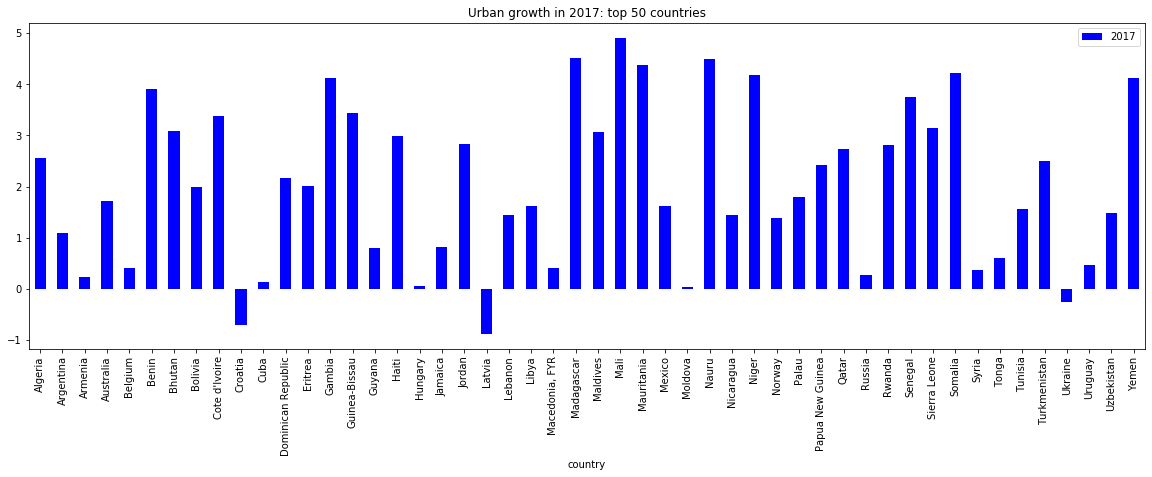

In [1090]:
#print a bar graph
urb_growth_orig_sample.plot(kind='bar',
                            x='country',
                            y='2017', 
                            figsize=(20,6), 
                            title='Urban growth in 2017: top 50 countries',
                            color='b')

### Findings: 
With the bar graph I could have an overview of this indicator in some countries, in 2017.<br>
Analyzing the countries with UG higher than 3.5 twice, I found that most of the countries with higher UG are in Africa, mainly in East Africa. <br>
**Run 1:**<br>
Bahrain: in the Persian Gul<br>
Congo: Central Africa<br>
Mozambique: Southern African<br>
Niger: West Africa<br>
Somalia: East Africa<br>
Tanzania: East Africa<br>
Uganda: East Africa<br>
**Run 2:**<br>
Cameroon: Central Africa<br>
Etiophia: East Africa<br>
Gambia: West Africa<br>
Mauritania: Northwest Africa<br>
Senegal: West Africa <br>
South Sudan: North Africa <br>
Tanzania: East Africa<br>
Uganda: East Africa<br>
Zambia:  East Africa<br>
(Source: Wikipedia)<br>

###  2) Comparison of two indicators

Parameters: 3 Scatters: **Urban growth vs hdi**, **Urban growth vs Gini**, and **Urban growth vs Population growth, 2017**. <br>

In [1065]:
urb_growth_orig.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,5.14,5.19,5.24,5.28,5.34,5.37,5.40,5.39,5.45,...,3.40,3.46,3.70,3.980,4.15,4.19,4.06,3.82,3.56,3.41
1,Albania,5.39,3.89,3.29,3.18,3.11,2.98,2.86,2.86,3.07,...,1.44,1.47,1.61,1.790,1.85,1.74,1.65,1.48,1.54,1.54
2,Algeria,5.52,6.62,6.83,6.76,6.74,6.73,5.89,3.26,3.30,...,2.76,2.82,2.88,2.950,3.00,2.99,2.92,2.81,2.68,2.56
3,Andorra,10.50,11.20,10.70,10.30,9.72,9.23,8.75,8.29,7.88,...,1.07,0.61,-0.12,-0.935,-1.70,-2.12,-2.06,-1.65,-1.05,-0.52
4,Angola,5.07,5.35,5.64,5.61,5.54,5.42,5.32,5.26,5.27,...,4.87,4.85,4.83,4.810,4.77,4.72,4.65,4.56,4.47,4.38


In [1066]:
#Compare the relationship between variables (independent vs dependent:urban growth vs hdi)
#Create a table to scatter
#Filter and rename to urb_growth(2017)
urb_growth_orig_2017 = urb_growth_orig.drop(urb_growth_orig.iloc[:, 1:-1], axis=1)
urb_growth_orig_2017.rename(columns={'2017': 'urb_growth_2017'},inplace = True)
urb_growth_orig_2017

,country,urb_growth_2017
0,Afghanistan,3.41
1,Albania,1.54
2,Algeria,2.56
3,Andorra,-0.52
4,Angola,4.38
...,...,...
189,Venezuela,1.31
190,Vietnam,3.04
191,Yemen,4.13
192,Zambia,4.24


In [1067]:
#Filter
hdi_2017=hdi_new.drop(hdi_new.iloc[:, 1:-1], axis=1)
hdi_2017.rename(columns={'2017': 'hdi_2017'},inplace = True)
hdi_2017

,country,hdi_2017
0,Afghanistan,0.498
1,Albania,0.785
2,Algeria,0.754
3,Andorra,0.858
4,Angola,0.581
...,...,...
157,Uzbekistan,0.710
158,Vanuatu,0.603
159,Yemen,0.452
160,Zambia,0.588


In [1068]:
#merge dfs originals urban and hdi
ug_hdi_2017 = pd.merge(urb_growth_orig_2017,hdi_2017, on ='country')
#print(ug_hdi_2017)
ug_hdi_2017

,country,urb_growth_2017,hdi_2017
0,Afghanistan,3.41,0.498
1,Albania,1.54,0.785
2,Algeria,2.56,0.754
3,Andorra,-0.52,0.858
4,Angola,4.38,0.581
...,...,...,...
157,Uzbekistan,1.48,0.710
158,Vanuatu,2.54,0.603
159,Yemen,4.13,0.452
160,Zambia,4.24,0.588


In [1069]:
#urb_growth_orig_2017.head()
urb_growth_orig.shape

(194, 59)

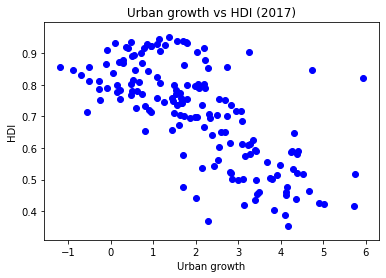

In [1089]:
#Graph urban growth vs hdi

x = ug_hdi_2017['urb_growth_2017']  
y = ug_hdi_2017['hdi_2017']

plt.scatter(x,y, color='b')
plt.xlabel('Urban growth')
plt.ylabel('HDI')
plt.title('Urban growth vs HDI (2017)')
plt.show()

In [1071]:
gini_orig.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


In [1072]:
# UG vs gini
gini_orig_2017=gini_orig.drop(gini_orig.iloc[:,1:-24], axis=1)
gini_orig_2017.drop(gini_orig_2017.iloc[:,-23:], axis=1, inplace=True)
gini_orig_2017.rename(columns={'2017': 'gini_2017'},inplace = True)
gini_orig_2017

,country,gini_2017
0,Afghanistan,36.8
1,Albania,29.0
2,Algeria,27.6
3,Andorra,40.0
4,Angola,42.6
...,...,...
190,Venezuela,46.9
191,Vietnam,35.2
192,Yemen,36.7
193,Zambia,57.1


In [1073]:
#merge dfs originals urban and gini
ug_gini_2017 = pd.merge(urb_growth_orig_2017,gini_orig_2017, on ='country')
print(ug_gini_2017)

         country  urb_growth_2017  gini_2017
0    Afghanistan             3.41       36.8
1        Albania             1.54       29.0
2        Algeria             2.56       27.6
3        Andorra            -0.52       40.0
4         Angola             4.38       42.6
..           ...              ...        ...
189    Venezuela             1.31       46.9
190      Vietnam             3.04       35.2
191        Yemen             4.13       36.7
192       Zambia             4.24       57.1
193     Zimbabwe             2.14       43.2

[194 rows x 3 columns]


In [1074]:
# UG vs PG
pop_growth_orig_2017 = pop_growth_orig.drop(pop_growth_orig.iloc[:,1:-1], axis=1)
pop_growth_orig_2017.rename(columns={'2017': 'pop_growth_2017'}, inplace=True)
pop_growth_orig_2017.head()

,country,pop_growth_2017
0,Afghanistan,2.490
1,Albania,-0.092
2,Algeria,1.740
3,Andorra,-0.410
4,Angola,3.310


In [1075]:
#merge dfs originals urban and pop growth
ug_pop_2017 = pd.merge(urb_growth_orig_2017,pop_growth_orig_2017, on ='country')
ug_pop_2017.head()

,country,urb_growth_2017,pop_growth_2017
0,Afghanistan,3.41,2.490
1,Albania,1.54,-0.092
2,Algeria,2.56,1.740
3,Andorra,-0.52,-0.410
4,Angola,4.38,3.310


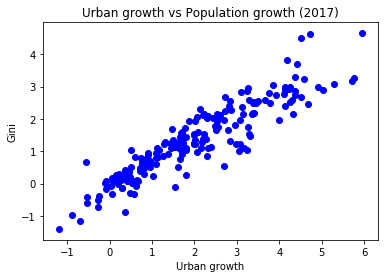

In [1088]:
#Graph urban growth vs pop growth

x = ug_pop_2017['urb_growth_2017']
y = ug_pop_2017['pop_growth_2017']

plt.scatter(x,y, color='b')
plt.xlabel('Urban growth')
plt.ylabel('Gini')
plt.title('Urban growth vs Population growth (2017)')
plt.show()

urb_growth and pop_growth are checked just if there are many outliers, and their behavious along their rates.<br>
Since they are bases on population growth, they cannot be compared.<br>

### Findings: 
Urban growth vs HDI- moderate, linear and negative relationship (inversely proportional).<br>
Urban growth vs Gini- weak, linear and positive relationship (directly proportional).<br>
Urban growth vs pop growth- strong, linear and positive relationship (directly proportional).<br> 
Therefore:<br>
    There is some relationship between urban growth(UG) and HDI. The higher the UG, the lower the HDI.<br>
    The strong relationship between UG and population growth (PG) was shown. This was expected since the UG is based on the PG.<br>
However:<br>
Urban growth vs pop growth, the higher the indexes, the weaker is the relationship between them; on the other hand, the rarer are the occurrences of outliers.<br>    

### 3) Comparison the evolution of four indicators 
(Evolution of metrics)


Parameters: a line graph with the 4 indicators, 2007-2017.<br>

In [1077]:
urb_growth_country = urb_growth_orig.set_index('country')

#Transpose df
urb_growth_transposed = urb_growth_country.transpose()

#Discard unneeded data:
urb_growth_germany_transposed = pd.DataFrame(urb_growth_transposed.Germany)

#Rename column
urb_growth_germany_transposed=urb_growth_germany_transposed.rename(columns={'Germany': 'ug_in_germany'})
urb_growth_germany_transposed.head()

,ug_in_germany
1960,1.250
1961,1.210
1962,0.970
1963,1.020
1964,0.896


In [1078]:
hdi_country=hdi_new.set_index('country') #set country as index

#Transpose df
hdi_transposed = hdi_country.transpose()

#Discard unneeded data:
hdi_germany_transposed = pd.DataFrame(hdi_transposed.Germany)

#Rename column
hdi_germany_transposed = hdi_germany_transposed.rename(columns={'Germany': 'hdi_in_germany'})

hdi_germany_transposed.head()


,hdi_in_germany
1999,0.855
2000,0.860
2001,0.867
2002,0.872
2003,0.877


In [1079]:
gini_orig

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,62.8,62.8,62.8,62.8,62.8,62.8,62.8,62.8,62.8,...,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9
191,Vietnam,34.2,34.2,34.2,34.2,34.2,34.2,34.2,34.2,34.2,...,35.3,35.3,35.3,35.3,35.3,35.3,35.3,35.3,35.3,35.3
192,Yemen,50.1,50.1,50.1,50.1,50.1,50.1,50.1,50.1,50.1,...,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7
193,Zambia,54.5,54.5,54.5,54.5,54.5,54.5,54.5,54.5,54.5,...,57.1,57.1,57.1,57.1,57.1,57.1,57.1,57.1,57.1,57.1


In [1080]:
gini_country=gini_orig.set_index('country') #set country as index

#Transpose df
gini_transposed = gini_country.transpose()

#Discard unneeded data:
gini_germany_transposed = pd.DataFrame(gini_transposed.Germany)

#Rename column
gini_germany_transposed = gini_germany_transposed.rename(columns={'Germany': 'gini_in_germany'})
gini_germany_transposed.head()

,gini_in_germany
1800,50.8
1801,50.8
1802,50.8
1803,50.8
1804,50.8


In [1081]:
pop_growth_country=pop_growth_orig.set_index('country') #set country as index

#Transpose df
pop_growth_transposed = pop_growth_country.transpose()

#Discard unneeded data:
pop_growth_germany_transposed = pd.DataFrame(pop_growth_transposed.Germany)

#Rename column
pop_growth_germany_transposed = pop_growth_germany_transposed.rename(columns={'Germany': 'pg_in_germany'})
pop_growth_germany_transposed.head()

,pg_in_germany
1960,0.783
1961,0.770
1962,0.879
1963,0.926
1964,0.805


In [1082]:
#normalize gini droping rows

gini_germany_transposed=gini_germany_transposed[gini_germany_transposed.index > '1959']
gini_germany_transposed=gini_germany_transposed[gini_germany_transposed.index < '2018']
gini_germany_transposed


#df[df.Name != 'Alisa']


,gini_in_germany
1960,32.6
1961,33.1
1962,33.3
1963,33.3
1964,33.0
1965,32.6
1966,32.0
1967,31.4
1968,30.9
1969,30.2


In [1083]:
# merge indicators MA
frames1=[urb_growth_germany_transposed, gini_germany_transposed , hdi_germany_transposed, pop_growth_germany_transposed]
#indicators_germany = pd.concat(frames1, axis=1, sort=False)
indicators_germany = pd.concat(frames1, join='outer', axis=1,sort=False)
#indicators_germany = pd.concat(frames1, join='outer', axis=1,sort=False).fillna('nan')

indicators_germany.info()
#ug: 1960-2017
#gini
#hdi
#pg #1960-2017


<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 1960 to 2017
Data columns (total 4 columns):
ug_in_germany      58 non-null float64
gini_in_germany    58 non-null float64
hdi_in_germany     19 non-null float64
pg_in_germany      58 non-null float64
dtypes: float64(4)
memory usage: 2.3+ KB


In [1094]:
#include columns of moving average by 10 years
indicators_germany['germany_ug_10years']=urb_growth_germany_transposed.ug_in_germany.rolling(10).mean().shift()
indicators_germany['germany_hdi_10years']=hdi_germany_transposed.hdi_in_germany.rolling(10).mean()
indicators_germany['germany_gini_10years']=gini_germany_transposed.gini_in_germany.rolling(10).mean()
indicators_germany['germany_pg_10years']=pop_growth_germany_transposed.pg_in_germany.rolling(10).mean()

#indicators_germany.head(60)


In [1095]:
indicators_germany_MA10 = indicators_germany.drop(['ug_in_germany', 'gini_in_germany','hdi_in_germany', 'pg_in_germany'], 1)
#drop unneeded rows
indicators_germany_MA10 = indicators_germany_MA10[indicators_germany_MA10.index > '1969']

#indicators_germany_MA10.head(60)

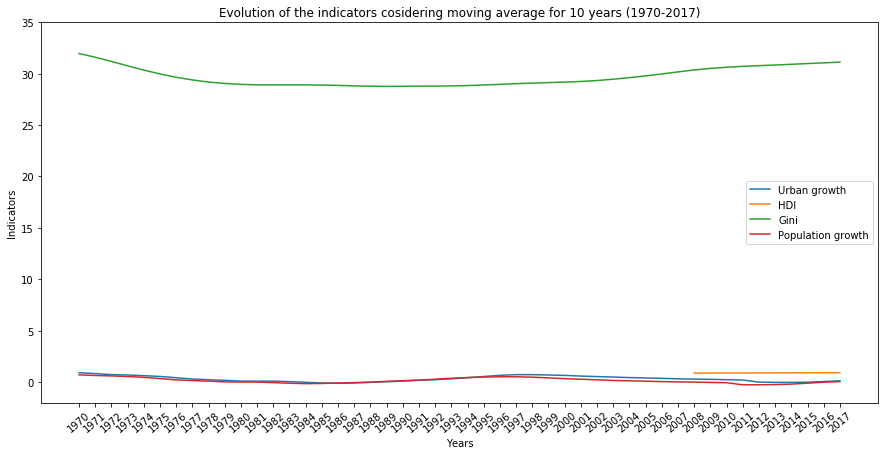

In [1093]:
#Show a line graph of indicators considerinh moving average for 10years 
#Set the dimension of the figure
plt.figure(figsize=(15,7))
#List the values of the indexes
x=indicators_germany_MA10.index.values.tolist()
#Set the indicatorrs to be plotted
y1=indicators_germany_MA10['germany_ug_10years']
y2=indicators_germany_MA10['germany_hdi_10years']
y3=indicators_germany_MA10['germany_gini_10years']
y4=indicators_germany_MA10['germany_pg_10years']

#Set the limits of y
plt.ylim(-2,35)
#Set the indicators and their labels
plt.plot(x, y1, label = "Urban growth") 
plt.plot(x, y2, label = "HDI") 
plt.plot(x, y3, label = "Gini") 
plt.plot(x, y4, label = "Population growth")
#Set the labels to the axis
plt.xlabel('Years')
plt.ylabel('Indicators') 
#Rotate values in the x axis
plt.xticks(x, rotation=40)
#Set the title of the graph
plt.title('Evolution of the indicators cosidering moving average for 10 years (1970-2017)')
#Set the legend
plt.legend() 
#Plot
plt.show()

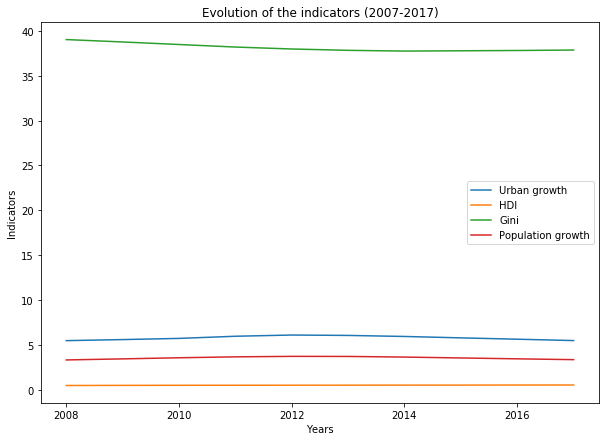

In [1087]:
#Lines graph from the last 10 years # parameters manually selected0
plt.figure(figsize=(10,7))
x = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017] 
# line 1 points
y1 = [5.466,5.584,5.716,5.956,6.092,6.048,5.932,5.776,5.626,5.474] 
# line 2 points  
y2 = [0.4646,0.4784,0.4880,0.4924,0.4970,0.5022,0.5052,0.5074,0.5178,0.5208]
y3 = [39.033333,38.766667,38.483333,38.200000,37.983333,37.833333,37.750000,37.783333,37.816667,37.866667]
y4 = [3.315000,3.433330,3.556667,3.660000,3.713333,3.705000,3.635000,3.535000,3.438333,3.346667]
plt.plot(x, y1, label = "Urban growth") 
plt.plot(x, y2, label = "HDI") 
plt.plot(x, y3, label = "Gini") 
plt.plot(x, y4, label = "Population growth") 

# naming the x axis 
plt.xlabel('Years') 
# naming the y axis 
plt.ylabel('Indicators') 
# giving a title to my graph 
plt.title('Evolution of the indicators (2007-2017)') 

# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

### Findings:
The dataframe for Gini cover a broad period while HDI cover just feel years. 
The Gini's dataframe was normalized with the period covered by Urban growth and Population growth to promote a visualization of moving average of 10 years for the indicators. Annual means were used to compare the indicators between 2007 and 2017. <br>
In the last 10 years, the evolution of the UG was very similar to the PG, as expected, and also similar to the HDI. Similar result was sohwn in the moving average graph.<br>
The Gini has a less stable than other indicators, tending to decline.<br>

<a id='conclusions'></a>
## Conclusions

The higher urban growth (UG) is in the African continent, mainly in East Africa.<br>
HDI is a variable inversely proportional to the UG, but with a weak relationship. <br> Considering the comparison between two indicators (2017) and their evolution (2017-2017 and 1970-2017), HDI is still better than the Gini.<br>
The scatter graphs (to 2017) and the linear graph (to 2017) show the expected similarity in the evolution of UG and PG.<br>
Even the indicators Urban growth and Pop growth are based on population growth, it is shown that the higher their indexes, the weaker is the relationship between them.<br>
This study uses small samples to make a first, simplified analysis. As well as, it has limitations by lack of statistical tests and does not imply any statistical conclusions.<br> 
